# Trabalho de grupo
##### Elementos do grupo:
- Guilherme Sousa Silva Martins, A92847
- Maria Miguel de Oliveira Soares, A92826

##### Mestrado Integrado em Engenharia Física - 1º Ano - 2º Semestre;      Universidade do Minho;              2020
### - Unidade Curricular: Dados e Computação (DC);                         Professor: Jorge Sousa Pinto

##### Bibliografia: 'Automata and Computability: A Programmer's Perspective', por Ganesh Gopalakrishnan

# Autómatos Finitos Determinísticos (DFA)

ESPAÇO DEDICADO à Importação de funções do JOVE:

In [1]:
import sys
sys.path[0:0] = ['..','../3rdparty'] # Put these at the head of the search path
from jove.DotBashers          import *
from jove.TransitionSelectors import *
from jove.SystemImports       import *
from jove.Def_md2mc           import * 
from jove.Def_DFA             import *

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



Os conjuntos de funções importados anteriormente pretencem ao JOVE e serão bastante úteis para a construção de autómatos.
Antes de iniciarmos a definição propriamente dita dos autómatos deterministicos finitos (DFA's), é necessário apresentarmos algumas noções teóricas sobre __dicionários__ e a sua potencialidade nos DFA's.

### Definiçaõ e representação de Dicionários (em Python)
Os DFAs serão representados por dicionários, representações de funções parciais.
A sua utilização é muito semelhante à dos _arrays_, sendo os índices substituídos aqui por chaves de um tipo arbitrário. 
Os dicionários podem ser vistos como "registos", ou "fichas", como um determinado conjunto de campos, cada um deles com um determinado valor.
Tal como os _arrays_, os dicionários são mutáveis, ou seja o valor de cada campo pode ser alterado, como ilustrado pelo exemplo seguinte:

In [2]:
ingredientes_sopa = { 
    'cebolas' : 1, 
    'cenouras' : 4, 
    'courgettes' : 2, 
    'espinafres' : 200, 
    'grao de bico' : 100
}
print(ingredientes_sopa)

ingredientes_sopa['cenouras'] = 2
print(ingredientes_sopa)

{'cebolas': 1, 'cenouras': 4, 'courgettes': 2, 'espinafres': 200, 'grao de bico': 100}
{'cebolas': 1, 'cenouras': 2, 'courgettes': 2, 'espinafres': 200, 'grao de bico': 100}


O domínio e co-domínio de um dicionário pode ser obtido pelas funções seguintes:

In [3]:
print(fn_dom(ingredientes_sopa))
print(fn_range(ingredientes_sopa))
print(set(fn_range(ingredientes_sopa)))

['cebolas', 'cenouras', 'courgettes', 'espinafres', 'grao de bico']
[1, 2, 2, 200, 100]
{200, 1, 2, 100}


Finalmente, o método _update_ atualiza um dicionário a partir de outro. Isto permite alterar valores associados a chaves, e também acrescentar pares com chaves novas. Podemos reparar no seu potencial no exemplo abaixo:

In [4]:
em_falta = { 'nabo' : 1 , 'espinafres': 150 }
ingredientes_sopa.update(em_falta)
print(ingredientes_sopa)

{'cebolas': 1, 'cenouras': 2, 'courgettes': 2, 'espinafres': 150, 'grao de bico': 100, 'nabo': 1}


## Construção de Autómatos

Um DFA (Autómato Finito Determinístico) pode ser representado por um tuplo $(Q, \Sigma, \delta, q_0,F)$, que é representado por um dicionário com 5 campos, onde:
  * Q - representa o conjunto de estados do autómato;
  * $\Sigma$ - representa o alfabeto de simbolos;
  * $\delta$- representa o conjunto de transições;
  * $q_0$ - representa o estado inicial do autómato;
  * F - representa o conjunto de estados finais do autómato.
  
Então, para representar este tuplo utilizar-se-á um dicionário com 5 campos, onde cada campo representará cada elemento do quintuplo, como ilustrado pelo exemplo seguinte, que traduz o DFA que reconhece as palavras com um número de 0s múltiplo de 3:

In [5]:
dfa0mult3 = { 'Q': {'IF', 'A', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

Ananlisando cada campo, verificamos que:
* os campos $Q$, $\Sigma$, e $F$ são conjuntos; 
* o campo $Q_0$ é um estado;
* o campo $\delta$ é um outro dicionário, sendo esta a estrutura adequada para a representação de funções. As chaves deste dicionário são pares (estado, símbolo), e os valores são os novos estados resultantes de cada transição.

Para a visualização dos autómatos é utilizada a função *dotObj_dfa_w_bh*, como se ilustra, de seguida, para a representação do  autómato anterior descrito 

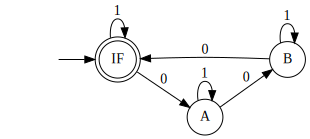

In [6]:
dotObj_dfa_w_bh(dfa0mult3)

> _Notemos_ que é perfeitamente possível definir-se autómatos como dicionários que não encaixam na definição formal de autómato.
Por exemplo, 
* a função de transição pode referir estados que não tenham sido listados no conjunto de estados;
OU
* a função de transição pode não ser total! Isto é, podem não estar especificadas todas as transições em todos os estados. 

Para vermos o efeito destas incoerências é muito útil definir funções (predicados) para testar/veriifcar a coerência de autómatos. 

Mas antes de as defenirmos, precisamos de definir os requesitos o autómato precisa de cumprir para ser PARCIALMENTE CONSISTENTE `is_partially_consistent_dfa_DC` ou CONSISTENTE (ou TOTAL) `is_consistent_dfa_DC`.

### Coerência dos DFA

Em consequência, dos dicionários serem uma estrutura nativa do Python, ao os usarmos para descrever os autómatos enfretámos a possibilidade de termos autómatos que não estejam de acordo com a sua definição. Como exemplo disso, é o caso de:
 
  * a função de transição pode referir estados que não tenham sido listados no conjunto de estados; 
  * a função de transição pode não ser total: isto é, podem não estar especificadas todas as transições em todos os estados. 

Podemos ver qual o efeito destas incoerências na visualização, alterando o autómato anterior: 
  * no primeiro, caso obter-se-á um erro;
  * no segundo, será impresso um pseudo-autómato, com função de transição parcial. 
  
Com o objetivo de evitar tais incoerências é nos bastante útil definir funções que nos permitam testar a coerência dos autómatos. Primeiramente, vamos passar por definir uma função onde a função de transição pode ser parcial.

Para a definição da coerência parcial do autómato, primeiramente, passamos por definir:
   * dom_delta como sendo, precisamente, as chaves do dicionário que define as transições do autómato ($\delta$); 
   * range_Delta os valores destas chaves, ou seja, os estados resultantes de cada transição. 
   
Para além disso, é nos importante garantir que:
   * o conjunto Q, Sigma, Range_Delta *não são vazios*, dado que são imprescindíveis para a construção de um autómato;
   * o $q_0$, ou seja, o estado inicial esteja, obrigatoriamente, contido no conjunto de estados (Q);
   * o conjunto de estados finais (F), assim, como Range_Delta sejam um sub-conjunto do conjunto de estados (Q);
   
Por outro lado, a fim da coerência do autómato ser apenas parcial basta-nos garantir somente que o domínio das transições do autómato estão contidas no conjunto resultante do produto cartesiano entre o conjunto Q e Sigma.

In [7]:
#definição dada pelo professor
def is_partially_consistent_dfa_DC(D):

    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]

    dom_Delta   = set(fn_dom(Delta))
    range_Delta = set(fn_range(Delta)) 
   
    return (Q != {}              and
            Sigma != {}          and
            dom_Delta   <= set(product(Q,Sigma)) and
            range_Delta != {}    and
            range_Delta <= Q     and
            q0 in Q              and
            F <= Q)  

In [8]:
print(is_partially_consistent_dfa_DC(dfa0mult3))

True


Numa segunda definição pretendemos que a coerência do autómato seja total. Para tal efeito, é necessário que a coerência parcial do autómato seja verificada. Para além disso, a grande diferença em relação à função anterior é o facto de o domínio das transições tenha de ser efetivamente igual ao conjunto resultante do produto cartesiano entre o conjunto de estados (Q) e o alfabeto Sigma.

In [9]:
#definição dada pelo professor
def is_consistent_dfa_DC(D):

    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]


    return (is_partially_consistent_dfa(D) and
    set(fn_dom(Delta)) == set(product(Q, Sigma)))  

Para além destas funções de verifcação, o Jove inclui duas funções de construção de autómatos, nomeadamente `mkp_dfa`, que exige apenas corência parcial, ou seja, a função DELTA não precisa de ser total, e `mk_dfa`, que exige coerência total.

Ambas as funções:
* recebem os 5 componentes de um DFA;
* testam a coerência desses componentes;
* se houver coerência, devolvem o autómato com esses mesmos componentes.

Uma destas função `mkp_dfa` exige apenas a corência parcial, ou seja, a função delta não precisa de ser total, como já, anteriormente definimos. De seguida, é ilustrado um exemplo desta mesma função.

In [10]:
d1 = mkp_dfa ({'A', 'IF', 'B'},
              {'0', '1'},
              { ('IF', '0'): 'A',
                ('IF', '1'): 'IF',
                ('A', '0'): 'B',
                ('A', '1'): 'A',
#               ('B', '0'): 'IF',
                ('B', '1'): 'B' },
               'IF', 
               {'IF'})

print(d1)


{'Q': {'IF', 'B', 'A'}, 'Sigma': {'1', '0'}, 'Delta': {('IF', '0'): 'A', ('IF', '1'): 'IF', ('A', '0'): 'B', ('A', '1'): 'A', ('B', '1'): 'B'}, 'q0': 'IF', 'F': {'IF'}}


Uma segunda função `mk_dfa` difere da primeira por exigir a coerência total, como já anteriormente definimos. 
<br> De seguida, é possível testar esta mesma função.

In [11]:
d2 = mk_dfa ({'A', 'IF', 'B'},
              {'0', '1'},
              { ('IF', '0'): 'A',
                ('IF', '1'): 'IF',
                ('A', '0'): 'B',
                ('A', '1'): 'A',
                ('B', '0'): 'IF',
                ('B', '1'): 'B' },
               'IF', 
               {'IF'})

print(d2)

{'Q': {'IF', 'B', 'A'}, 'Sigma': {'1', '0'}, 'Delta': {('IF', '0'): 'A', ('IF', '1'): 'IF', ('A', '0'): 'B', ('A', '1'): 'A', ('B', '0'): 'IF', ('B', '1'): 'B'}, 'q0': 'IF', 'F': {'IF'}}


### Totalização  de DFA's

In [12]:
d00p  = mkp_dfa ({'A', 'IF'},
                 {'0', '1'},
                 { ('IF', '0'): 'A',
                   ('A', '0'): 'IF'},
                 'IF', 
                 {'IF'})

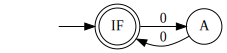

In [13]:
dotObj_dfa_w_bh(d00p)

Por vezes, temos a capacidade de sobre dado um alfabeto e um conjunto de estados criar um autómato que aceite uma dada linguagem sem que tenhamos de indicar um caminho para alguns dos símbolos do alfabeto. Observe-se o caso do autómato, anteriormente, criado (d00p), cujo o seu alfabeto é {0,1}, no entanto, não temos qualquer tipo de transição para o caso do símbolo 1.

Em detrito disto, é útil também dispormos de uma função de totalização de autómatos, ou seja, uma função que nos permite acrescentar ao que chamámos de **buraco negro**, um estado especial, e as transições em falta, transições estas que nos permitem ter um *caminho* para todos os símbolos. Neste caso concreto, permitir-nos-á ter presente as transições quando se trata do símbolo 1 que culminarão então no tal estado de buraco negro.

De seguida, iremos então definir a função `totalize_dfa_DC` que nos permite realizar o anteriormente descrito. 

Inicialmente, a função testa 2 pontos referentes à coerência:
   1. ao nível da **coerência parcial** uma vez que, caso contrário, não será possível aplicar esta função de transição;
   2. ao nível da  **coerência total** uma vez que, caso se verifique esta não é necessário fazer nada, pelo que é devolvido o próprio autómato.

Posteriormente, caso, então o autómato apresente coerência parcial mas não total iremos então trabalhar sobre Delta, onde Delta é um dicionário constituído por chaves do tipo (estado, simbolo) e valor que corresponde ao (novo estado).

Com o objtetivo de criar as transições que culminam num BH, construímos um novo dicionário (gaps_in_Tr). Este dicionário será então constituído por chaves (q,c) e o seu valor 'BH', para todo os pares (q,c) que não pertenciam ao nosso Delta inicial. 
De seguida, através da função `.update` iremos então adicionar o dicionário novo (gaps_in_Tr) ao nosso inicial (Delta).

Para além disso, por estarmos sobre o estudo de DFA e a sua totalização, resta-nos ainda criar um outro dicionário (bh_self_absorbent_moves). Este dicionário irá incluir todas as transições que constituem um ciclo sobre o próprio BH, ou seja, para todo o símbolo do alfabeto do autómato que parte do BH, irá culminar no próprio BH. 

Para este caso, é facil perceber baseando-nos no nosso autómato exemplo, onde teremos então uma transição do BH para o BH aquando da leitura quer do simbolo '1' quer do símvolo '0'. 

De seguida, novamente precisámos de adicionar este novo diconário (bh_self_absorbent_moves ) ao já existente. 

Por fim, como pretendemos a totalização de um autómato iremos precisamente devolver um autómato. 
  * Q - incluirá os estados já existentes e acrescentará o novo estado
  * $\Sigma$ - será o inicial;
  * $\delta$- será então o resultante de acrescemtarmos os novos dicionários;
  * $q_0$ - manter-se-á o mesmo;
  * F - manter-se-á o mesmo.

In [14]:
#definiçaõ dada pelo professor
def totalize_dfa_DC(D):

    assert(is_partially_consistent_dfa(D)), "DFA given to totalize_dfa is not partially consistent."

    if set(fn_dom(D["Delta"])) == set(product(D["Q"], D["Sigma"])):
        # It is already total!
        return D 
    else:        
        
        Delta = dict(D["Delta"])    # Porquê dict(...)
    
        gaps_in_Tr = { (q,c) : "BH" 
                       for q in D["Q"] for c in D["Sigma"] 
                       if (q,c) not in D["Delta"] }
    
        Delta.update( gaps_in_Tr )
    
        bh_self_absorbent_moves = { ("BH", c): "BH" 
                                    for c in D["Sigma"] }

        Delta.update( bh_self_absorbent_moves )
        
        return {"Q"    : D["Q"] | { "BH" }, 
                "Sigma": D["Sigma"],    
                "Delta": Delta,
                "q0"   : D["q0"],          
                "F"    : D["F"] }

Avisamos que a função foi escrita de forma a não alterar o autómato fornecido como *input*.

Podemos agora testar com o automáto anterior, verificando a adição de novas transições sobre o BH, como já tinhamos previsto e referido. 

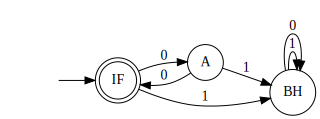

In [15]:
d00t = totalize_dfa_DC(d00p)

dotObj_dfa_w_bh(d00t)

## Operações sobre autómatos (Exercícios propostos pelo professor)

Ao nível dos conjuntos sabemos da possibilidade de usar operações como :
* *união*
* *intersecção*
* *complemento*

Estas que nos oferecem vantagens visto que nos permitem construir linguagens com elas. 

Dado este facto, transpondo para o caso dos autómatos também é bastante importante definirmos estas operações. Dada a sua importância o próprio Jove disponibiliza estas mesmas funções. 

### Complemento de um autómato (exercício proposto pelo professor)

Tendo como caso base o das linguagens, sabemos que o complemento de uma dada linguagem resultará da diferença da linguagem possível construir com todos os simbolos e da nossoa linguagem. 

Assim, ao nível dos autómatos, o complemento não será nada mais nada menos do que o complemento dos estados finais do autómato inicial. Ou seja, vejamos o caso do nosso autómato que tem como estado final o 'IF', o seu complemento resultará em os estados que não eram finais inicialemente passarem-no a sê-lo, ou seja, o estado 'A' e 'BH'.

Como se exemplifica, de seguida:

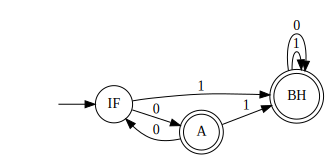

In [16]:
dooc = comp_dfa(d00p)

dotObj_dfa_w_bh(dooc)

Ora, a fim de definirmos o complemento de um autómato é importante salientar que vamos, primeiramente, totalizar o autómato, uma vez que há casos que possa ser necessário.

Focando no objetivo de simplesmente complementar o conjunto de estados finais do autómato inicial, a nossa definição passará por simplesmente devolver o campo do conjuntos finais como sendo a diferença entre o conjunto de estados (Q (resultante da totalização)) e o conjunto de estados finais (F (resultante da totalização)) do autómato a que estamos a aplicar a função. 

Para além disso, no que diz respeito aos outros 4 campos que constituem um autómato retornaremos simplesmente para cada um deles o resultante de aplicar a função de totalização, ou seja, excetuando as possíveis alterações em consequência de se aplicar a função de totalização nada mais é feito nestes campos para conseguirmos o complemnto de um autómato.

In [17]:
def comp_dfa_DC (D):
    
        M = totalize_dfa (D)
        
        Q     = M["Q"]
        Sigma = M["Sigma"]
        Delta = M["Delta"]
        q0    = M["q0"]
        F     = M["F"]
        
        
        return {"Q"    : Q , 
                "Sigma": Sigma,    
                "Delta": Delta,
                "q0"   : q0,          
                "F"    : Q-F }
    

Aplicando agora a nossa definição `comp_dfa_DC` ao autómato (d00p):

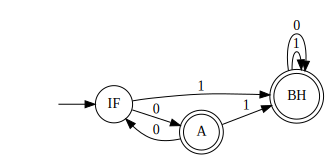

In [18]:
dool = comp_dfa_DC (d00p)

dotObj_dfa_w_bh(dool)

### União de Autómatos 

A união de dois autómatos é também numa operação bastante útil, um vez que a união de dois autómatos A e B, constituirá na mesma um autómato onde este reconhece a linguagem que resulta da união das linguagens reconhecidas por A e B. 

Para podermos visualizar o resultado da união de dois autómatos é necessário criarmos um outro autómato sobre o mesmo alfabeto, pelo que é isso que fazemos de seguida com o auxílio da função `mkp_dfa`, já descrita.

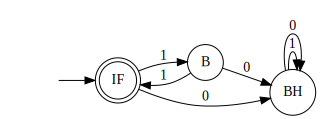

In [19]:
d11p = md2mc('''DFA IF: 1 -> B  B: 1 -> IF''')

d11p  = mkp_dfa ({'B', 'IF'},
                 {'0', '1'},
                 { ('IF', '1'): 'B',
                   ('B', '1'): 'IF'},
                 'IF', 
                 {'IF'})

d11t = totalize_dfa_DC(d11p)

dotObj_dfa_w_bh(d11t)


Assim, aplicando a função `union_dfa`podemos visualizar o resultado da união de dois autómatos (d00t e d11t).

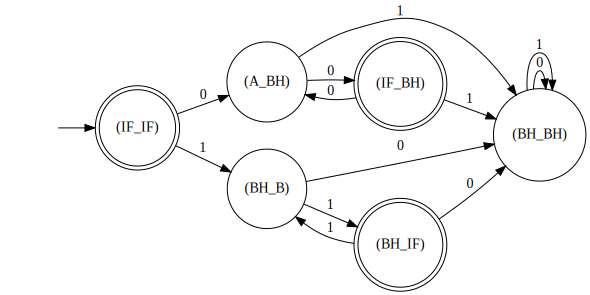

In [20]:
d0011u = union_dfa(d00t,d11t)
dotObj_dfa_w_bh(d0011u)

No que diz respeito à definição da função `union_dfa_DC`, é importante estabelecer vários pontos que estão no raciocínio por detrás da função para a construção do autómato.
Caminhando, assim, respetivamente pelo tuplo que caracteriza um DFA dado que a união de 2 autómatos A e B é, então, um autómato temos que:
* **Estados**

     Numa perspetiva informal e mesmo visual como já verificámos, os estados deste autómato correspondem a pares de estados, onde o primeiro estado é do autómato A e o segundo estado do autómato B. No entanto, observando o autómato (d0011u) resultante da união concluímos que o conjunto de estados não resulta diretamente e simplesmente do produto cartesiano entre os estados do autómato A e os do autómato B. Pelo que excluí, por exemplo, um estado (A, B) uma vez que mediante qualquer leitura do símbolo do alfabeto nunca teria uma transição que ligasse este estado ao inicial.
     
    Assim, de forma a clarificar criámos uma função `estados_h` meramente para o cálculo dos estados do autómato união. O objetivo desta função é então criar um conjunto de pares de estados onde vai verificar se nas transições para cada um dos autómatos a leitura de cada símbolo do alfabeto a partir de um estado do respetivo autómato (A/B) leva a um estado do próprio autómato (A/B). Por fim, este passo exclui um único estado, o que corresponde ao par dos estados iniciais de cada autómato, pelo que resta uni-lo ao conjunto de estados.
   
   
*    **Sigma**

     Agora, retornando, à nossa função `union_dfa_DC`, a função de união de autómatos só faz sentido quando os alfabetos dos 2 autómatos que pretendemos incluir é o mesmo. Consequentemente, verificámos se efetivamente isso acontece e se tal se verifica simplesmente retornaremos o alfabeto de um dos autómatos, já que a união de autómatos mantém o alfabeto dos 2 autómatos. 
     
     Caso contrário, simplesmente não se aplica a função se a divergência dos alfabetos se verificar.
  
  
*   **Delta**

    No que diz respeito, às transições que farão parte do Delta serão obtidas seguindo o seguinte raciocínio:

Se em A:         |             Se em B:
-------------    |            -------------
(A1,c) -> B1     |           (A2,c) -> B2
                 |   
                 
Então na união de A e B:         |            
-------------    |            
((A1,A2),c)    ->   (B1,B2)     |           
                 |   

Assim, partindo do conjunto de pares de estados do autómato vamos verificar se mediante a leitura de cada símbolo do alfabeto e partindo de um estado do autómato (A/B) leva a um estado do autómato, respetivamente (A/B) e nesse caso torna-se possível a contrução de cada uma das transições (((a,b),c): (Q1, Q2)).

* **Estado Inicial**

   Relativamente ao estado inicial do nosso autómato será simplesmente um par de estados, onde a primeira coordenada trata-se do estado inicial do 1 autómato (A) e a segunda coordenada trata-se do estado inicial do 2 autómato (B).


* **Estados Finais**

  No que diz respeito aos estados finais, no caso da união, basta que um dos estados do par seja final, não necessitando que ambas as componentes que formam o par de estados sejam estados finais do seu autómato respetivo(A/B).
  
  Neste sentido, precisámos de apenas garantir que ou a primeira coordenada do par corresponde a um estado final do autómato A ou a segunda coordenada corresponde a um estado final do autómato B.

In [21]:
def estados_h (A, B):
    B1 = totalize_dfa (B)
    A1 = totalize_dfa (A)

    estados = {(Q1, Q2)
          for a in A1 ["Q"] for b in B1 ["Q"] for c in A1 ["Sigma"] for Q1 in A1 ["Q"] for Q2 in B1 ["Q"]
          if A1["Delta"][(a,c)] == Q1 and B1 ["Delta"] [(b,c)] == Q2 }

    estados_q0 = estados.union ({(A ["q0"], B ["q0"])})

    return estados_q0

In [22]:
def union_dfa_DC (A,B) :

    if is_consistent_dfa (A) and is_consistent_dfa (B) and A ["Sigma"] == B ["Sigma"]:
            A1 = totalize_dfa (A)
            B1 = totalize_dfa (B)
            
            
            estados = estados_h (A, B)
            
            delta = {((a,b),c): (Q1, Q2)
                for (a,b) in estados for c in A1 ["Sigma"] for Q1 in A1 ["Q"] for Q2 in B1["Q"]
                if A1["Delta"][(a,c)] == Q1 and B1["Delta"] [(b,c)] == Q2}
            
            iniciais = (A ["q0"], B ["q0"])
        
            finais = {(Q1, Q2)
                 for (Q1, Q2) in estados
                 if Q1 in A1 ["F"] or Q2 in B1["F"]}
        
    return {"Q": estados , 
            "Sigma": A["Sigma"],    
            "Delta": delta,
            "q0"   : iniciais,          
            "F"    : finais}
            

Aplicando, agora a função `union_dfa_DC`é possível visualizar o resultado da união dos autómatos d00t e d11t.

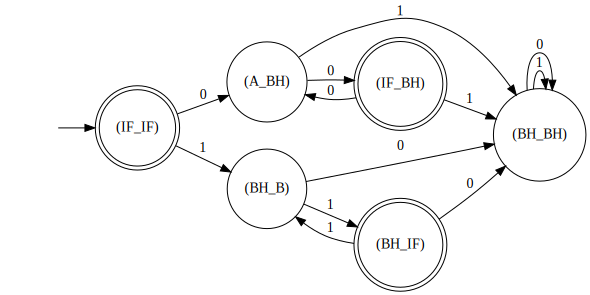

In [23]:
d0011uu = union_dfa_DC(d00t,d11t)
dotObj_dfa_w_bh(d0011uu)

### Interseção de autómatos 

Uma outra operação útil relativamente aos autómatos é a de interseção, onde a interseção de dois autómatos A e B resultará num outro autómato.
De seguida, conseguimos visualizar em que consite então a interseção de 2 autómatos.


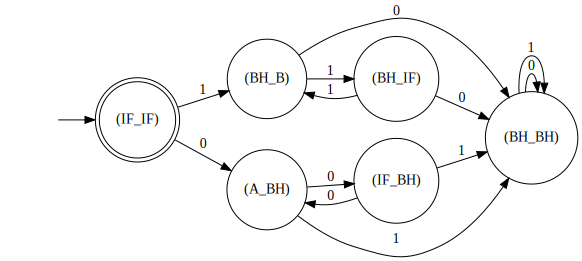

In [24]:
d0011i = intersect_dfa(d00t,d11t)
dotObj_dfa_w_bh(d0011i)

Ora, após a visualização do resultado da função `intersect_dfa` é trivial identificar grandes semelhanças com o autómato resultante de `union_dfa`, assim como, identificar onde residem as diferenças.

Comparativamente, à `union_dfa` a interseção de 2 autómatos diferencia-se no facto de o conjunto de estados finais serem pares onde as coordenadas de cada par são respetivamente os estados finais de cada um dos autómatos, não bastando que apenas uma das componentes do par fosse final, como acontecia no caso de `union_dfa`.  

Nesse sentido, a função `intersect_dfa_DC` será então bastante semelhante à `union_dfa_DC`, existindo simplesmente a diferença relativamente ao conjunto de estados finais.

Desta forma, vamos também fazer o uso da função `estados_h`, quanto à função `intersect_dfa_DC` vamos manter o mesmo raciocínio para os campos dos estados, sigma, delta e estados iniciais.  
Relativamente ao conjunto de estados finais vamos então exigir que tanto a primeira componente do par como a segunda constituam estados finais dos respetivos autómatos (A/B).


In [25]:
def estados_h (A, B):
            B1 = totalize_dfa (B)
            A1 = totalize_dfa (A)
        
            estados = {(Q1, Q2)
                  for a in A1 ["Q"] for b in B1 ["Q"] for c in A1 ["Sigma"] for Q1 in A1 ["Q"] for Q2 in B1 ["Q"]
                  if A1["Delta"][(a,c)] == Q1 and B1 ["Delta"] [(b,c)] == Q2 }
            
            estados_q0 = estados.union ({(A ["q0"], B ["q0"])})
            
            return estados_q0
        

In [26]:
def intersect_dfa_DC (A,B) :

    if is_consistent_dfa (A) and is_consistent_dfa (B) and A ["Sigma"] == B ["Sigma"]:
            A1 = totalize_dfa (A)
            B1 = totalize_dfa (B)
            
            
            estados = estados_h (A, B)
            
            delta = {((a,b),c): (Q1, Q2)
                for (a,b) in estados for c in A1 ["Sigma"] for Q1 in A1 ["Q"] for Q2 in B1["Q"]
                if A1["Delta"][(a,c)] == Q1 and B1["Delta"] [(b,c)] == Q2}
            
            iniciais = (A ["q0"], B ["q0"])
        
            finais = {(Q1, Q2)
                 for (Q1, Q2) in estados
                 if Q1 in A1 ["F"] and Q2 in B1["F"]}
        
    return {"Q": estados , 
            "Sigma": A["Sigma"],    
            "Delta": delta,
            "q0"   : iniciais,          
            "F"    : finais}
            

Desta forma, é então possível verificar de seguida o resultado da aplicação de `intersect_dfa_DC`.

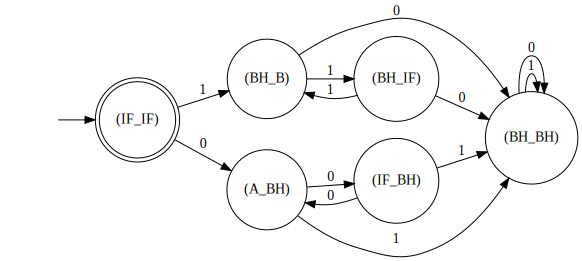

In [27]:
d0011int = intersect_dfa_DC (d00t,d11t)
dotObj_dfa_w_bh(d0011int)

## Execução de um Autómato

Agora vamos definir um predicado que decide se um autómato aceita ou não uma dada palavra (função `accepts_dfa_DC`). Para isso será necessário definir a função $\delta$ (função `step_dfa_DC`), que devolve o estado resultante da leitura de um dado símbolo pelo autómato, e a função $\hat{\delta}$ (função `run_dfa_DC`), que devolve o estado resultante da leitura de uma dada palavra pelo autómato. Relembremos que:

- $\hat{\delta}(q, \varepsilon)\ \ \ =\ q$

- $\hat{\delta}(q, xs)\ = \hat{\delta}(\delta(q,x),s)$

O autómato aceitará a palavra $s$ se $ \hat{\delta}(q_0, s) \in F$ (conjunto dos estados finais).

Primeiramente, vamos definir a função `step_dfa_DC` que dado um determinado autómato, um estado e um determinado simbolo do autómato vai nos indicar para que estado transita. 

Desta forma, precisámos apenas de garantir que o símbolo que a função vai receber pertence ao alfabeto do autómato, assim como, o estado que vai receber também tem de pertencer ao conjunto de estados do autómato. Posteriomente, fazemos simplesmente uso da capacidade do Jove de calcular o resultado de uma dada transição a partir de um estado e da leitura de um símbolo. 

Apresentámos, de seguida, vários exemplos resultantes da aplicação desta função.

step_dfa(dfa0mult3, 'IF', '1') =  IF
step_dfa(dfa0mult3, 'A', '0') =  B


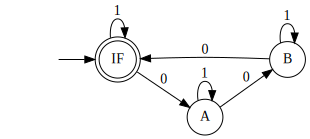

In [28]:
#definição fornecida pelo professor
def step_dfa_DC(D, q, c):

    assert(c in D["Sigma"]), "step_dfa given c not in Sigma."
    assert(q in D["Q"]), "step_dfa given q not in Q."

    return D["Delta"][(q,c)]



print("step_dfa(dfa0mult3, 'IF', '1') = ", 
          step_dfa_DC(dfa0mult3, 'IF', '1'))

print("step_dfa(dfa0mult3, 'A', '0') = ", 
          step_dfa_DC(dfa0mult3, 'A', '0'))

dotObj_dfa_w_bh(dfa0mult3)

De seguida, vamos então definir a função `run_dfa_DC` que tem como objetivo calcular o estado do autómato em que se fica após a leitura de uma palavra, ou seja, uma string composta por símbolos. Para isso, vamos usar a ajuda da função `step_dfa_DC` na medida que vamos implementar um ciclo while e vamos calculando o estado que resulta mediante a leitura de cada símbolo que constituí a palavra, começando, como é óbvio a apartir do estado inicial e fechando o ciclo quando a palavra for vazia, ou seja, quando já tiver sido cada símbolo e calculado o estado do automáto que resulta da leitura deste símbolo. 

Mais uma vez, demonstrámos exemplos da aplicação desta função.

In [29]:
# definição dada pelo professor
def run_dfa_DC(D, s):

    state = D["q0"]
    while s != "":
        state = step_dfa_DC(D, state, s[0])
        s = s[1:]
    return state



print("run_dfa(dfa0mult3, '101001') = ", 
          run_dfa(dfa0mult3, '101001'))
print("run_dfa(dfa0mult3, '101000') = ", 
          run_dfa(dfa0mult3, '101000'))

run_dfa(dfa0mult3, '101001') =  IF
run_dfa(dfa0mult3, '101000') =  A


Ora, dado que o nosso objetivo era então definir uma função que nos indicasse se uma determinada palvara é aceite é importante perceber com base na definição formal de um autómato como se processa a aceitação de uma determinada palavra.

erificámos que a aceitação de uma determinada palavra pode ser descrita recursivamente da eguinte forma:

$\hat{\delta}(q, \varepsilon)\ \ \ =\ q$

$\hat{\delta}(q, xs)\ = \hat{\delta}(\delta(q,x),s)$

Consequentemente, o autómato aceitará a palavra $s$ se $ \hat{\delta}(q_0, s) \in F$, ou seja se o estado que a após a leitura de uma palavra termina é um estado final de um autómato. 

Note-se também que a forma recursiva apresentada é precisamente o raciocínio utilizada por detrás da função `run_dfa_DC`.

Consequentemente, será a ajuda desta função que vamos utilizar para a definição de `accepts_dfa_DC`. Assim, vamos simplesmente verificar se a aplicação da função `run_dfa_DC` dá como resultado um estado que pertença ao conjunto finais do autómato.

Caso, se verifique a função retorna True, caso contrário, retorna False.

In [30]:
# definição dada pelo professor
def accepts_dfa_DC(D, s):

    return run_dfa_DC(D, s) in D["F"]



print("accepts_dfa(dfa0mult3, '101001') = ", 
          accepts_dfa(dfa0mult3, '101001')) 
print("accepts_dfa(dfa0mult3, '101000') = ", 
          accepts_dfa(dfa0mult3, '101000')) 


accepts_dfa(dfa0mult3, '101001') =  True
accepts_dfa(dfa0mult3, '101000') =  False


### Construção de Grafos a partir de Autómatos (tópico extra de trabalho) + (exercícios propostos pelo professor)

Os grafos são objetos matemáticos que são também utilizados como estruturas de dados em programação. 

Um grafo orientado é um par $(V,E)$ com $V$ um conjunto finito de vértices ou nós e $E$ uma relação binária sobre $V$ – o conjunto de arestas ou arcos do grafo. Em programação, um grafo é reprsentado sob a forma de um _dicionário_, onde os seus vértices são os estados $Q$ do autómto.

Exemplo:

In [31]:
g = {}

g[1] = [2]
g[2] = [2,4,5]
g[3] = []
g[4] = [1,5]
g[5] = [4]
g[6] = [3]

print(g)
print(type(g))
print(type(g[1]))

{1: [2], 2: [2, 4, 5], 3: [], 4: [1, 5], 5: [4], 6: [3]}
<class 'dict'>
<class 'list'>


Para podermos construir grafos a partir de autómatos precisamos ter em conta a representação autómatos finitos determinísticos. A função de transição é representada como um dicionário cujas entradas (chaves) são _pares_ (estado, símbolo), ocorrendo cada estado várias vezes.
O autómato `dfa0mult3`, representado abaixo, é um excelente exemplo disso:

In [32]:
dfa0mult3 = { 'Q': {'IF', 'A', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

print(dfa0mult3['Delta'])

{('IF', '0'): 'A', ('IF', '1'): 'IF', ('A', '0'): 'B', ('A', '1'): 'A', ('B', '0'): 'IF', ('B', '1'): 'B'}


Podemos converter esta representação numa dos grafos, no entanto, nunca deixando de preservar a presença dos símbolos. Podemos, por exemplo, associar a cada estado não uma lista de estados adjacentes, mas um dicionário que associa a um símbolo lido o estado que resulta dessa leitura, tal como feito abaixo no autómato `dfa0mult3`:

In [33]:
g_dfa0mult3 = {}
g_dfa0mult3['IF'] = {'0': 'A', '1': 'IF'}
g_dfa0mult3['A'] = {'0': 'B', '1': 'A'}
g_dfa0mult3['B'] = {'0': 'IF', '1': 'B'}

print(g_dfa0mult3)

{'IF': {'0': 'A', '1': 'IF'}, 'A': {'0': 'B', '1': 'A'}, 'B': {'0': 'IF', '1': 'B'}}


Por isso, apresentamos a nossa definição e a sua explicação para a função `DFA_graph` tal que `DFA_graph(dfa0mult3)` resulte no grafo `g_dfa0mult3`, de acordo com o exemplo apresentado acima.

__(Explicação da função `DFA_graph`)__

1. Depois de obtermos todos os dados acerca do autómato recebido D, criamos o dicionário VAZIO `grafo_dfa` na  qual iremos armazenar as transições do grafo (criado a partir do autómato D). As transições terão de ser do tipo ($q_1$)->($x$,$q_2$), onde $q_1$ é o estado onde o DFA se encontra, $s$ o símbolo lido e $q_2$ o estado resultante da transição.
2. Para construirmos as transições do grafo, precisamos primeiro de recolher os pares ($q$, $x$) de $\delta$ e, para cada estado $q$ de $Q$, todas as transições possíveis para cada elemento $x$ do alafabeto $\Sigma$ recebido e os seus estados finais correspondentes. Ao longo que se vão obtendo os dados referidos anteriormente para cada estado $q$ de $Q$, vamos adicionando a um _set_ `conjunto` as transições ($q_1$)->($x$,$q_2$), sempre para um especíifco estado $q_1$. No final de cada travessia para cada estado $q$, o `conjunto` de $q$ é adicionado ao grafo.
3. Depois de concluídas todas as travessias em todos os estados do DFA, convertemos completamente o DFA no grafo desejado.

In [34]:
def DFA_graph(D):
    
    # obtenção das várias partes necessárias do autómato D
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]

    grafo_dfa={}
    n_estados=len(Q)
    n_simbllos=len(Sigma)   
    pares_possíveis=set(fn_dom(Delta))
    
    for i in Q:
        estado_atual=i
        conjunto={}
        for j in Sigma:
            if (i,j) in pares_possíveis:
                simbolo=j
                par=(estado_atual, simbolo)
                estado_result=Delta[par]
                em_falta={simbolo : estado_result}               
                conjunto.update(em_falta)
        grafo_dfa[i]=conjunto

    return(grafo_dfa)


Vamos verificar o funcionamento da função `DFA_graph`, confirmando se o autómato `dfa0mult3` resulta no grafo `g_dfa0mult3`, tal como representado logo no início do tópico.

In [35]:
print(DFA_graph(dfa0mult3))

{'IF': {'1': 'IF', '0': 'A'}, 'B': {'1': 'B', '0': 'IF'}, 'A': {'1': 'A', '0': 'B'}}


Apesar da ordem dos estados do grafo do autómato estarem trocadas, conseguimos obter o que pretendíamos inicialmente com a função. Estamos preparados para o próximo tópico! 

### Listagem de Palavras Aceites (exercícios propostos pelo professor)

Agora que apresentamos uma função que testa a aceitação de palavras, será igualmente importante haver funções capazes de gerar, por uma determinada ordem, as palavras aceites por um autómato. 

É necessário referir que esse conjunto pode não ser finito, e é necessário cuidado com a ordem com que se geram as palavras, uma vez que é importante assegurar que todas serão eventualmente geradas. Em autómatos com *ciclos*, se se efetuar sempre mais uma iteração do *ciclo* antes de explorar outros caminhos, vai-se listar o conjunto infinito de palavras construídas com aquele *ciclo*, antes de se listar outras que não passem pelo *ciclo*.

Desta forma, vamos apresentar duas funções (`gera_palavras_nciclos` e `gera_palavras_cciclos`, respetivamente) e para o mesmo objetivo, mas que atuam sob duas situações particulares, respetivamente:

- o autómato não possui *ciclos*, ou seja, a linguagem regular reconhecida não pode ser construída com o operador $*$ ;
- o autómato pode conter *ciclos*, na qual a segunda função apenas devolverá as palavras construídas que não passam *por ciclos*.

Já para a terceira função (`gera_palavras_n`) que definimos, esta recebe, para além de um autómato, um número inteiro $n$, e lista todas as palavras, incluindo as que são construídas atravessando ciclos, com comprimento não superior a $n$.


------------------------------------------------------------------------------------------------------------------------
1. Comecemos com a função `gera_palavras_nciclos`. A nossa definição da função apresenta-se abixo da explicação.

    Objetivo: produzir a lista de todas as palavras aceites por um determinado autómato recebido.
    
    > __Nota__: Para esta admitiremos que o autómato dado *não tem ciclos* (isto é, a linguagem regular reconhecida não é construída com o operador $*$ ) e teremos em conta que o número de palavras é necessariamente *finito*.
    
    __(Explicação da função `gera_palavras_nciclos`)__
    
    __a)__ Para além de obtermos todos os dados acerca do autómato D recebido, temos de coverter o autómato num grafo possível manusear através da função `DFA_graph`. Por questões de facilidade, criou-se uma função auxiliar `gera_palavras_nciclos_aux` na qual ela tem guadado o grafo do automato, o estado $q$ em que se encontra o autómato, o conjunto de estados finais e os símbolos já lidos pelo autómato na etapa em que se encontra. Estes dados serão muito utéis paar os próximos passos. A primeira vez que essa função é utilizada é sempre OBRIGATORIAMENTE a partir do estado inicial $q_0$
    
    __b)__ Cada vez que a função auxiliar é inicializada, são obtidos alguns dados também importantes para a função auxiliar, nomeadamente, as transições possíveis do grafo a partir do estado $q$ e os conjuntos ordenados de símbolos e dos estados resultantes das transições mencionadas anteriormente. 
    
    __c)__ Neste momento, precisamos de definir 3 situações possíveis para podermos progredir na leitura do próximo símbolo:
    1. o estado atual pode ser final e não haver mais transições possíveis, o faz com que a função possa devolver todo o conjunto de símbolos (que formam a palavra) lidos até este ponto;
    2. o estado atual pode ser final, mas há transições possíveis a partir do estado atual, o faz com que a função possa devolver todo o conjunto de símbolos (que formam a palavra) lidos até este ponto; e prosseguir com tantas novas funções `gera_palavras_nciclos_aux` quanto o número de transições possíves a partir de $q$;
    3. o estado autual não é final, e, por isso, continuamos a listagem das palabras, agora com tantas novas funções `gera_palavras_nciclos_aux` quanto o número de transições possíves a partir de $q$.

In [36]:
# admitindo que o autómato dado *não tem ciclos*
def gera_palavras_nciclos(D):
    
    # obtenção das várias partes necessárias do autómato D
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]
    
    grafo_D=DFA_graph(D)
    return(gera_palavras_nciclos_aux(grafo_D, q0, F, ''))

# grafo_D - grafo do autómato DFA
# q - estado recebido
# F - conjunto estados finais
# s - palavra
def gera_palavras_nciclos_aux(grafo_D, q, F, s):
    
    possible_transicoes=grafo_D[q]
    simbolos=fn_dom(possible_transicoes)
    estados_result=fn_range(possible_transicoes)

    if (q in F) and (possible_transicoes==[]):
        if s==(''):
            print('-epsilon-')
        else:
            print(s)
    elif (q in F) and (possible_transicoes!=[]):
        if s==(''):
            print('-epsilon-')
            for i in range(0,len(possible_transicoes)):
                gera_palavras_nciclos_aux(grafo_D, estados_result[i], F, s+simbolos[i])
        else:
            print(s)
            for i in range(0,len(possible_transicoes)):
                gera_palavras_nciclos_aux(grafo_D, estados_result[i], F, s+simbolos[i])
    else:
        for i in range(0,len(possible_transicoes)):
                gera_palavras_nciclos_aux(grafo_D, estados_result[i], F, s+simbolos[i])
    

Vamos verificar o funcionamento da função `DFA_graph` no autómato `dfa0mult4` definido abaixo, esperando que escreva no ecrã $\epsilon$, 01 e 001.

In [37]:
dfa0mult4 = { 'Q': {'IF', 'A', 'B', 'C'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('A', '0'): 'B',
                         ('A', '1'): 'C',
                         ('B', '0'): 'C'},
              'q0': 'IF', 
              'F': {'IF','C'}   
            }

print(dfa0mult4['Delta'])

print('\n','Lista de palavras geradas pelo automato: {')
print(gera_palavras_nciclos(dfa0mult4), '}')

{('IF', '0'): 'A', ('A', '0'): 'B', ('A', '1'): 'C', ('B', '0'): 'C'}

 Lista de palavras geradas pelo automato: {
-epsilon-
01
000
None }


Observando os resultados, a função devolveu as palavras que já esperavamos, confirmando o seu total funcionamento na geração das palavras aceites pelo autómato *sem ciclos* (à exceção do _NONE_ no final da execução, algo que nos é impercetível de o resolver, infelizmente).

------------------------------------------------------------------------------------------------------------------------
2. Agora, para a função `gera_palavras_cciclos`. A nossa definição da função apresenta-se abaixo da explicação.

    Objetivo: listar apenas as palavras construídas *sem passar por ciclos*.
    
    > __Nota__: Para esta função admitiremos que o autómato dado pode *ter ciclos* (isto é, a linguagem regular reconhecida pode ser construída com o operador $*$ ) e teremos em conta que o número de palavras é necessariamente *finito*.
    
    Antes de iniciarmos a explicação, explicaremos o processo de travessia (adaptado) em grafos utilizado para a função desejada.
    Uma __travessia em profundidade__ do grafo formado a partir de DFA pode ser bastante útil para a listagem de todas as palavras NÃO formadas por *ciclos* e aceites por um determinado autómato construído por *ciclos* OU *sem ciclos*, o que corresponde ao que pretendemos com a estratégia de travessia caracteriza-se pelo seguinte enunciado:

    > Todos os estados adjacentes a um estado $Q1$ são visitados, por ordem, imediatamente a seguir a $Q1$

    Desta forma, a travessia em profundidade aprsenta a vantagem de evitamos que um mesmo estado Q já visitado volte a ser visitado.

    À semelhança com o acontece com os grafos tipicamente normais (ou seja, não relacionados aos autómatos), será necessário utilizar durante a execução de uma travessia num grafo um código de cores, tal que cada estado do grafo de um autómato possa encontrar-se num dos três estados associado a um cor:

    - ainda não alcançado pela travessia __[BRANCO]__ 
    - já alcançado, mas alguns dos seus estados adjacentes ainda não foram alcançados __[CINZENTO]__
    - já processado (todos os seus adjacentes foram alcançados) __[PRETO]__
    
__Note que__:

- quando é encontrado um estado adjacente cinzento, isso significa que foi detectado um *ciclo* durante a travessia;

- quando é encontrado um estado adjacente preto, isso significa que a travessia chegou a um estado já visitado, mas isto não aconteceu ao percorrer um ciclo.

Começemos pela apresentação da definição da função `visit_dfa`, que recebe um grafo de um dado DFA

Para esta função, a técnica de travessia em profundidade teve de ser alterada, por isso o código de cores passará a ser exclusivamente 'WHITE' e 'BLACK', sendo que a única alteração é a de que agora apenas interessa se um estado já foi visitado ou não. Caso seja encontrado um estado pintado de 'BLACK', estamos perante um ciclo indesejado e a geração de palavras não pode prosseguir nesse estado.
    
__(Explicação da função `gera_palavras_cciclos`)__

__a)__ Para além de obtermos todos os dados acerca do autómato D recebido, temos de pintar todos os estados do autómato de 'WHITE'e coverter o autómato num grafo possível manusear através da função `DFA_graph`. Por questões de facilidade, criou-se uma função auxiliar `gera_palavras_nciclos_aux` na qual ela tem guadado o grafo do automato, o estado $q$ em que se encontra o autómato, o conjunto das cores dos vários estados do autómato e dos estados finais e os símbolos já lidos pelo autómato na etapa em que se encontra. Estes dados serão muito utéis paar os próximos passos. A primeira vez que essa função é utilizada é sempre OBRIGATORIAMENTE a partir do estado inicial $q_0$.

__b)__ Cada vez que a função auxiliar é inicializada, o estado $q$ em que se encontra é pintado de 'BLACK' e são obtidos alguns dados também importantes para a função auxiliar, nomeadamente, as transições possíveis do grafo a partir do estado $q$, os conjuntos ordenados de símbolos e estados resultantes (bem como as suas cores) das transições mencionadas anteriormente. 

__c)__ Neste momento, precisamos de definir 3 situações possíveis para podermos progredir na leitura do próximo símbolo:
1. o estado atual pode ser final e não haver mais transições possíveis, o faz com que a função possa devolver todo o conjunto de símbolos (que formam a palavra) lidos até este ponto;
2. o estado atual pode ser final, mas há transições possíveis a partir do estado atual, o faz com que a função possa devolver todo o conjunto de símbolos (que formam a palavra) lidos até este ponto; e prosseguir com tantas novas funções `gera_palavras_nciclos_aux` quanto o número de transições possíves a partir de $q$;
3. o estado autual não é final, e, por isso, continuamos a listagem das palabras, agora com tantas novas funções `gera_palavras_nciclos_aux` quanto o número de transições possíves a partir de $q$.

In [38]:
# D - autómato DFA
def gera_palavras_cciclos(D):
    
    # obtenção das várias partes necessárias do autómato D
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]
    
    color={}

    for q in D["Q"]:
        color[q]='WHITE'
    grafo_D=DFA_graph(D)
    return(gera_palavras_cciclos_aux(grafo_D, q0, color, F, ''))

# grafo_D - grafo do autómato DFA
# q - estado recebido
# color - cores dos estados do grafo
# F - conjunto estados finais
# s - palavra
def gera_palavras_cciclos_aux(grafo_D, q, color, F, s):
    
    color[q] = 'BLACK'
    possible_transicoes=grafo_D[q]
    simbolos=set(fn_dom(possible_transicoes))
    estados_result=set(fn_range(possible_transicoes))
    color_estados=set({})
    for v in (estados_result):
        color_estados.update(color[v])
    if (q in F) and ('WHITE' not in color_estados):
        if s==(''):
            print('-epsilon-')
        else:
            print(s)
    else:
        for i in range(0,len(possible_transicoes)):
            if 'WHITE' in color[estados_result[i]]:
                gera_palavras_ccliclos_aux(grafo_D, estados_result[i], color, F, s+simbolos[i])


Vamos verificar a funcionalidade da função anterior no autómato `dfa0mult3`(um DFA com ciclos). Será de esperar que a função devolva a palavra vazia $\epsilon$.

In [39]:
print(gera_palavras_cciclos(dfa0mult3))

-epsilon-
None


Tal como previsto, a função devolveu a palavra vazia. No entanto, também aparece _NONE_ no final da execução, algo que nos é novamente impercetível de o resolver, infelizmente.


------------------------------------------------------------------------------------------------------------------------
3. Por último, temos a função `gera_palavras_n`. A nossa definição da função apresenta-se abaixo da explicação.

Objetivo: receber, além de um autómato, um número inteiro $n$, e listar todas as palavras, incluindo as que são construídas atravessando ciclos, com comprimento não superior a $n$.

__NOTA__: as palavras serão geradas consoante a ordem das transições entre estados (definidas pelo grafo resultante da conversão do autómato DFA).

  __(Explicação da função `gera_palavras_n`)__
    
A explicação é a mesma qua a da função `gera_palavras_nciclos`, com algumas diferenças:
1. a função auxiliar `gera_palavras_n_aux` também recebe o comprimento máximo $n$ das palavras aceites pelo autómato.
2. antes de a função auxiliar poder avançar para a leitura do próximo símbolo, esta precisa de verificar sempre que o comprimento da palavra já lida é inferior a $n$. Caso $n$ seja igual ou superior ao comprimento da palavra, `gera_palavras_n_aux` deixa de fazer a geração de palavras para o DFA.

In [40]:
# D - automato DFA
# n - comprimento máximo da palavra
def gera_palavras_n(D,n):
    
    # obtenção das várias partes necessárias do autómato D
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]
    
    grafo_D=DFA_graph(D)
    return(gera_palavras_n_aux(grafo_D, q0, F, '', n))

# grafo_D - grafo do autómato DFA
# q - estado recebido
# F - conjunto de estados finais
# s - palavra
# n - comprimento máxim0 da palavra
def gera_palavras_n_aux(grafo_D, q, F, s, n):
    
    possible_transicoes=grafo_D[q]
    simbolos=fn_dom(possible_transicoes)
    estados_result=fn_range(possible_transicoes)

    if (q in F) and (possible_transicoes==[]):
        if s==(''):
            print('-epsilon-')
        else:
            print(s)
    elif (q in F) and (possible_transicoes!=[]):
        if s==(''):
            print('-epsilon-')
            if len(s)<n:
                for i in range(0,len(possible_transicoes)):
                    gera_palavras_n_aux(grafo_D, estados_result[i], F, s+simbolos[i], n)
        else:
            print(s)
            if len(s)<n:
                for i in range(0,len(possible_transicoes)):
                    gera_palavras_n_aux(grafo_D, estados_result[i], F, s+simbolos[i], n)
    else:
        if len(s)<n:
                for i in range(0,len(possible_transicoes)):
                    gera_palavras_n_aux(grafo_D, estados_result[i], F, s+simbolos[i], n)
    

Vamos verificar o funcionamento da função `gera_palavras_n` no autómato `dfa0mult3`. Para $n$ igual a 3, espera-se que escreva no ecrã $\epsilon$, 000, 1, 11, 111 (espera-se que o autómato escreva por ordem alfabética, e não por ordem numérica).

In [41]:
print(gera_palavras_n(dfa0mult3,3))

-epsilon-
1
11
111
000
None


Como previsto, a função devolveu os números desejados e pela ordem que esperavamos (apesar da constante presença do _NONE_).

### Remoção de Estados Inalcançáveis (exercício proposto pelo professor)

É possível definir-se um autómato coerente contendo estados que não podem ser alcançados por nenhuma sequência de transições a partir do estado inicial . Por exemplo acescentando um estado 'C' ao autómato `dfa0mult3`:

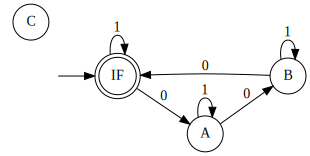

In [42]:
dfa0mult3_a = { 'Q': {'IF', 'A', 'B', 'C'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

dotObj_dfa_w_bh(dfa0mult3_a)

Aquando das operações de união e interseção de autómatos, surgem estados (pares de estados dos autómatos iniciais) que não são necessariamente alcançados a partir do estado inicial. Uma vez que estes estados não desempenham qualquer papel na aceitação de palavras, podemos eliminar estes estados a partir da função `pruneUnreach` (função do JOVE).

In [43]:
# definição fornecida pelo JOVE
def pruneUnreach(D):
    """In : D (consistent DFA)
       Out: Consistent DFA.
       Given a consistent (and of course total) DFA D,
       returns a new (consistent) DFA with unreachable 
       states in D removed. Transitions from each unreachable 
       state are also removed. Reachable states are those that
       can be reached in |D["Q"]| - 1 steps or less.
    """
    Nsteps   = len(D["Q"]) - 1 # Search this far
    Frontier = set({D["q0"]})  # BFS frontier
    AccumF   = Frontier        # Used to accumulate Frontier changes
    for n in range(Nsteps):
        for q in Frontier:
            for ch in D["Sigma"]:
                AccumF = AccumF | set({step_dfa(D, q, ch)})
        Frontier = AccumF
        
    newQ     = Frontier
    newF     = D["F"] & Frontier
    newDelta = dict({ ((q,ch),qp) 
                      for ((q,ch),qp) in fn_trans(D["Delta"]) 
                      if q in Frontier })
    return mk_dfa(Frontier, D["Sigma"], newDelta, D["q0"], newF)

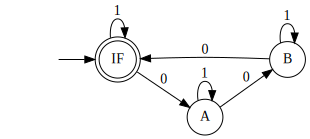

In [44]:
dfa0mult3_a_pruned = pruneUnreach(dfa0mult3_a)
dotObj_dfa_w_bh(dfa0mult3_a_pruned)

Apresentamos de seguida a nossa definição (e respetiva explicação) da função `pruneUnreach_DC`:

O código de cores é a mesma que a da funçaõ `gera_palavras_cciclos`, que se baseia nas cores [BRANCO] e [PRETO].

Para esta função usaremos uma lógica semelhante à da travessia de todos os caminhos num grafo. Teoricamente, um estado $q$ do autómato só é alcançável a partir do estado inicial $q_0$ se uma travessia de __((Número de estados de $Q$)-1)__ ou menos passos que permitam alcançar o estado desejado.

__(Explicação da função `pruneUnreach_DC`)__

__a)__ Para além de obtermos todos os dados dos 5 campos do autómato D recebido (e de fazermos cópias destes), temos de coverter o autómato num grafo possível manusear através da função `DFA_graph`. Todos os estados de $Q$ são pintados de 'WHITE', já que nunca foram visitados. Por questões de facilidade, criou-se uma função auxiliar `pruneUnreach_DC_aux` na qual verifica para cada estado $q$ de $Q$ se é alcançável em __((Número de estados de $Q$) -1)__ passos durante a travessia. Para tal, a função auxiliar guarda o grafo do automato, o estado $q_1$ em que se encontra o autómato, o estado $q_2$ que queremos alcançar, os conjuntos dos estados do automato, das cores dos respetivos estados do autómato e dos estados finais e o ((Número de estados de $Q$) -1) passos necesssários e número de passos já feitos durante a travessia. Estes dados serão muito utéis para os próximos passos. A primeira vez que essa função é utilizada, a travessia começerá OBRIGATORIAMENTE a partir do estado inicial $q_0$.
    

__b)__ Cada vez que a função auxiliar é inicializada, o estado $q$ em que se encontra é pintado de 'BLACK' e são obtidos alguns dados também importantes para a função auxiliar, nomeadamente, as transições possíveis do grafo a partir do estado $q$, os conjuntos ordenados de símbolos e estados resultantes (bem como as suas cores) das transições mencionadas anteriormente. 

__c)__ Neste momento, precisamos de definir 3 situações possíveis para podermos progredir na travessia:
1. O estado atual em que o autómato se encontra durante a travessia é o mesmo que aquele que queríamos alcançar, concluindo que o estado que queríamos alcançar é alcançável;
2. O número de passos dados durante a travessia ainda é ainda inferior ao número máximo de passos que podemos percorrer para chegar ao estado desejado.
    A partir daqui, verificando quais são as transições que nos levam a um estado 'WHITE' (ou seja, ainda não visitado, não nos leva a um *ciclo*), a função prossegue com tantas novas funções `pruneUnreach_DC_aux` quanto o número de transições possíves a partir de $q$ (o estado em que o autómato se encontra). Deve-se aumentar mais __1__ no número de passos dados durante a travessia.
    Desta forma, atravessamos todos os caminhos possíveis sem entrarmos em *ciclos*, podendo haver algum `pruneUnreach_DC_aux` que possa verificar se o estado desejado é ou não alcançável.
3. O número de passos dados durante a travessia passou a ser igual ao número máximo de passos que podíamos percorrer para chegar ao estado desejado.
    Neste caso, ou o estado atual é o estado desejado e concluímos que o estado é alcançável (devolvendo _True_ OU este não é mesmo alcançável (devolvendo _False_).
    
Caso nenhum dos casos anteriores se verifique, podemos confirmar que, para a travessia realizada, o estado desejado não é alcançável (mas pode ser alcançável noutro `pruneUnreach_DC_aux`).

__d)__ Depois de obtermos a *lista de sublistas* das várias travessias realizadas pelo autómato para verificar se um dado estado é alcançável, usamos a função `remove_parenteses` para eliminar os vários parenteses da lista referida e obter os vários valores *booleanos* numa única lista. (1) Se houver algum _True_ nessa lista, podemos concluir que o estado desejado é alcançável. (2) No entanto, se não houver nenhum _True_ nessa lista, podemos concluir que o estado desejado não é alcançável.
    A partir do ponto (2), temos de eliminar o estado $q$ de $Q$, também todas as transições de $\delta$ que partem de $q$ e que terminam em $q$ e eliminar $q$ de $F$. Fazendo isto para todos os estados de $Q$, contruímos um novo autómato, na qual foram eliminados todos os estados inalcançáveis.

In [45]:
#l - lista com parenteses
def remove_parenteses(l):
    lista_sem_parenteses=[]
    if l==[]:
        lista_sem_parenteses.append(False)
    else:
        for i in range(0,len(l)):
            if l[i]==True:
                lista_sem_parenteses.append(True)
            elif l[i]==False:
                lista_sem_parenteses.append(False)
            else: 
                lista_sem_parenteses=lista_sem_parenteses+remove_parenteses(l[i])
    return(lista_sem_parenteses)

In [46]:
# D - autómato DFA
def pruneUnreach_DC(D):
    
    # obtenção das várias partes necessárias do autómato D
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    q0    = D["q0"]
    F     = D["F"]
    
    dom_delta=fn_dom(Delta)    
    Q_copy=D["Q"].copy()
    F_copy=D["F"].copy()
    Sigma_copy=D["Sigma"].copy
    Delta_copy=D["Delta"].copy
        
    Q_new=D["Q"].copy()
    F_new=D["F"].copy()
    Sigma_new=D["Sigma"].copy
    Delta_new=D["Delta"].copy
    
    color={}
    for q in Q_copy:
        color[q]='WHITE'
    
    new_D={}

    
    grafo_D=DFA_graph(D)
    for q in Q_copy:
        color={}
        for j in Q_copy:
            color[j]='WHITE'
        n_max = len(Q)-1
        lista_prune_q=list()
        (lista_prune_q)=(lista_prune_q)+[pruneUnreach_DC_aux(grafo_D, q0, q, color, n_max, 0)]
        # print(lista_prune_q)
        if True not in (remove_parenteses(lista_prune_q)):
            print("O estado ", q," não é alcançavel!")
            Q_new.remove(q)
            for s in Sigma:
                if ((q,s)) in dom_delta:
                    del Delta[(q, s)]
            for est in dom_delta:
                if Delta[est]==q:
                    del Delta[est]
            if q in F:
                F_new.remove(q)
    new_dfa=dict({})
    new_dfa["Q"]=Q_new
    new_dfa["Sigma"]=Sigma
    new_dfa["Delta"]=Delta
    new_dfa["q0"]=q0
    new_dfa["F"]=F_new
    return(new_dfa)

# grafo_D - grafo do autómato DFA
# q - estado que queremos verficar se é alcançável pelo autómato DFA
# color - cores dos estados do grafo
# F - conjunto estados finais
def pruneUnreach_DC_aux(grafo_D, q, q_desejado, color, n_max, n):
    
    if q==q_desejado:
        return(True)
    elif n<n_max:
        color[q] = 'BLACK'
        possible_transicoes=grafo_D[q]
        simbolos=fn_dom(possible_transicoes)
        estados_result=fn_range(possible_transicoes)
        color_estados=[]
        # print(estados_result)
        for v in (estados_result):
            color_estados=color_estados+[color[v]]
        # print(color_estados)
        new_lista_prune=list()
        if 'WHITE' in color_estados:
            for i in range(0,len(possible_transicoes)):
                if color[estados_result[i]]=='WHITE':
                    new_lista_prune= new_lista_prune +[pruneUnreach_DC_aux(grafo_D, estados_result[i], q_desejado, color, n_max, n+1)]
        return(new_lista_prune)
    elif n==n_max:
        if q==q_desejado:
            return(True)
        else:
            return(False)
    else: 
        return(False)



Vamos agora verificar a funcionalidade da função `pruneUnreach_DC` no autómato `dfa0mult3_a`, esperando que seja removido o estado C.

{'Q': {'IF', 'C', 'B', 'A'}, 'Sigma': {'1', '0'}, 'Delta': {('IF', '0'): 'A', ('IF', '1'): 'IF', ('A', '0'): 'B', ('A', '1'): 'A', ('B', '0'): 'IF', ('B', '1'): 'B'}, 'q0': 'IF', 'F': {'IF'}} 

O estado  C  não é alcançavel!

 {'Q': {'IF', 'B', 'A'}, 'Sigma': {'1', '0'}, 'Delta': {('IF', '0'): 'A', ('IF', '1'): 'IF', ('A', '0'): 'B', ('A', '1'): 'A', ('B', '0'): 'IF', ('B', '1'): 'B'}, 'q0': 'IF', 'F': {'IF'}}


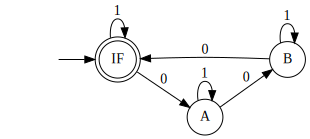

In [47]:
print(dfa0mult3_a, "\n")
dfa0mult3_a_new=pruneUnreach_DC(dfa0mult3_a)
print("\n",dfa0mult3_a_new)
dotObj_dfa_w_bh(dfa0mult3_a_new)

A função retirou o estado C do autómato `dfa0mult3_a`, tal como nós esperavamos, provando a funcionalidade do algoritmo de `pruneUnreach_DC`.

### Equivalência e Isomorfismo de DFAs (exercício proposto pelo professor)

Neste momento, vamos apresentar a nossa definição da `função h_langeq_dfa_DC` que recebe dois autómatos determinísticos, possivelmente com conjuntos de estados diferentes, e que diz se as linguagens por eles reconhecidas são iguais (ou seja, os DFAs dizem-se *equivalentes*). 

> Alertamos que não foi necessário gerar todas as palavras de ambas as linguagens, o que não seria viável em geral, dada a possível infinitude dessas linguagens. Em vez disso, podemos fazer uma *travessia simultânea* de ambos os autómatos, como no ponto anterior, sem percorrer ciclos. Se a qualquer momento dessa travessia for detetada uma diferença entre ambos, então a travessia pode parar com resultado _falso_. Se for possível completar a travessia sem qualquer diferença detetada, os autómatos reconhecem a mesma linguagem. 

Note-se que:
* estando os dois autómatos totalizados, as diferenças entre as execuções de ambos não são do tipo "em A1 existe transição pelo símbolo c, e em A2 não", porque as transições estão sempre definidas 
* relevante, sim, é quando num dos autómatos se chega a um estado final e no outro não: esta execução corresponde a uma palavra que é aceite por um dos autómatos e não pelo outro
* importante também é compreender que os ciclos que se pretende detetar (para evitar a sua execução) não são os que possam existir num dos autómatos, mas sim os da execução simultânea. Ou seja, quando regressamos a um par de estados (s1, s2), sendo que a execução já passou antes por esse mesmo par. 

Esta função existe em Jove com o nome `h_langeq_dfa`.  Dois DFAs dizem-se *isomorfos* se reconhecem a mesma linguagem e têm o mesmo número de estados. 


In [48]:
help(h_langeq_dfa)
help(iso_dfa)

Help on function h_langeq_dfa in module jove.Def_DFA:

h_langeq_dfa(q1, D1, q2, D2, Visited)
    Helper for langeq_dfa. 
    If (q1,q2) is in Visited, no screw-up so far, so
     continue. Else if they agree in status, recursively
     check for all reachable configurations (a DFS in
     recursion). Else (if they differ in status),
     then return (False, Visited) where the latter is
     the counter-example trace.

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)



In [49]:
#definiçaõ do JOVE
def h_langeq_dfa(q1, D1, q2, D2, Visited):
    
    if (q1,q2) in Visited:
        return (True, (q1,q2), Visited)
    else:
        Visited[(q1,q2)] = "" # extVisited = [(q1,q2)] + Visited  
        if not same_status(q1,D1,q2,D2):
            return (False, (q1,q2), Visited)
        else:
            l_nxt_status = list(
            map(lambda symb:
                h_langeq_dfa(D1["Delta"][(q1,symb)], D1,
                             D2["Delta"][(q2,symb)], D2,
                             Visited),
                D1["Sigma"]))
            l_rejects = list(filter(lambda x: x[0]==False, l_nxt_status))
            if l_rejects==[]:
                return (True, (q1,q2), Visited)
            else:
                return l_rejects[0] # which is the first offending (status,cex)

A nossa variante para a função `h_langeq_dfa_DC` apresenta-se a seguir:

__(Explicação da função `h_langeq_dfa_DC`)__:

__a)__ Para além de obtermos todos os dados dos 5 campos de ambos os autómatos D1 e D2 recebidos (e de fazermos cópias destes), temos de os coverter em grafo possíveis manusear através da função `DFA_graph`. Todos os estados de $Q$ são pintados de 'WHITE', já que nunca foram visitados. Por questões de facilidade, criou-se uma função auxiliar `h_langeq_dfa_DC_aux` na qual verifica se durante as travessias sem *ciclos* de D1 e D2 não aparecem diferenças entre elas. Para tal, a função auxiliar guarda os grafos de D1 e D2, os estados $q_1$ em que se encontras D1 e D2, os conjuntos dos estados dos automatos, das cores dos respetivos estados e dos estados finais. Estes dados serão muito utéis para os próximos passos. A primeira vez que essa função é utilizada, a travessia começerá OBRIGATORIAMENTE a partir do estado inicial $q_0$.

__b)__ Cada vez que a função auxiliar é inicializada, o estado $q$ em que se encontra é pintado de 'BLACK' e são obtidos alguns dados também importantes para a função auxiliar, nomeadamente, as transições possíveis do grafo a partir do estado $q$, os conjuntos ordenados de símbolos e estados resultantes (bem como as suas cores) das transições mencionadas anteriormente. 

__c)__ Neste momento, quando temos de avançar na função auxiliar, precisamos de verificar se ambas as situações de travessia de ambos os autómatos permitem a continuidade da tranvessia nas mesmas condições. Assim, surgem 4 situações possíveis:
1. Os estados atuais de ambos os autómatos são finais:
    
    __a)__ não existem mais transições possíveis para D1 e D2, concluindo que os dois autómatos são equivalentes nessa travessia; a função devolve _True_ .
    
    __b)__ existem transições possíveis para D1 e D2 e a leitura de símbolos é a mesma para essas mesmas transições; a partir daqui, verificando quais são as transições que nos levam a estados 'WHITE' (ou seja, ainda não visitado, não nos leva a um *ciclo*), a função prossegue com tantas novas funções `h_langeq_dfa_DC_aux` quanto o número de transições possíves a partir de $q$ (o estado em que o autómato se encontra). No caso de se encontrarem transições diferentes entre D1 e D2, a função devolve _False_ .
    
    
2. Os estados atuais de ambos os autómatos não são finais:
    
    __a)__ não existem mais transições possíveis para D1 e D2, concluindo que os dois autómatos são equivalentes nessa travessia; a função devolve _True_ .
    
    __b)__ existem transições possíveis para D1 e D2 e a leitura de símbolos é a mesma para essas mesmas transições; a partir daqui, verificando quais são as transições que nos levam a estados 'WHITE' (ou seja, ainda não visitado, não nos leva a um *ciclo*), a função prossegue com tantas novas funções `h_langeq_dfa_DC_aux` quanto o número de transições possíves a partir de $q$ (o estado em que o autómato se encontra). No caso de se encontrarem transições diferentes entre D1 e D2, a função devolve _False_ .
    
Caso nenhum dos casos anteriores se verifique, podemos confirmar que as travessias são realizadas de maneira para ambos os autómatos. Por issso, a função devolve _False_ .

__d)__ Depois de obtermos a *lista de sublistas* das várias travessias realizadas por D1 e D2, usamos a função `remove_parenteses` (já definida anteriormente) para eliminar os vários parenteses da lista referida e obter os vários valores *booleanos* numa única lista. Se houver algum _False_ nessa lista, podemos concluir que os dois autómatos não são equivalentes.
No entanto, se não houver nenhum _False_ na lista, podemos concluir que os dois autómatos são equivalentes.

In [50]:
# D1 e D2 - autómatos DFA
def h_langeq_dfa_DC(D1, D2):
    
    D1_tot=D1
    D2_tot=D2
    
    # obtenção das várias partes necessárias dos autómatos
    Q1     = D1_tot["Q"]
    Sigma1 = D1_tot["Sigma"]
    Delta1 = D1_tot["Delta"]
    q01    = D1_tot["q0"]
    F1     = D1_tot["F"]
    
    Q2     = D2_tot["Q"]
    Sigma2 = D2_tot["Sigma"]
    Delta2 = D2_tot["Delta"]
    q02    = D2_tot["q0"]
    F2     = D2_tot["F"]
    
    color1={}
    color2={}

    for q in Q1:
        color1[q]='WHITE'
    for q in Q2:
        color2[q]='WHITE'
    grafo_D1=DFA_graph(D1_tot)
    grafo_D2=DFA_graph(D2_tot)
    #print([h_langeq_dfa_DC_aux(grafo_D1, q01, color1, F1, grafo_D2, q02, color2, F2)])
    if False in (remove_parenteses([h_langeq_dfa_DC_aux(grafo_D1, q01, color1, F1, grafo_D2, q02, color2, F2)])):
        print("Os dois autóamtos recebidos NÃO são equivalentes!")
    else:
        print("Ambos os autómatos recebidos são equivalentes!")

# grafo_D1 e grafo_D2 - grafo do autómato DFA
# q1 e q2 - respetivos estados em que os automatos se encontram atualmente
# color1 e color2 - cores dos estados dos grafo_D1 e grafo_D2
# F1 e F2 - conjuntos dos estados finais dos dois automatos
def h_langeq_dfa_DC_aux(grafo_D1, q1, color1, F1, grafo_D2, q2, color2, F2):
    
    color1[q1] = 'BLACK'
    color2[q2] = 'BLACK'
    possible_transicoes1=grafo_D1[q1]
    possible_transicoes2=grafo_D2[q2]
    simbolos1=set(fn_dom(possible_transicoes1))
    simbolos2=set(fn_dom(possible_transicoes2))
    estados_result1=set(fn_range(possible_transicoes1))
    estados_result2=set(fn_range(possible_transicoes2))
    color_estados1=set({})
    color_estados2=set({})
    estados_white1=set({})
    estados_white2=set({})
    
    for v in (estados_result1):
        color_estados1.update(color1[v])
        if color1[v]=='WHITE':
            estados_white1.update(v)
    #print(estados_white1)
    for v in (estados_result2):
        color_estados2.update(color2[v])
        if color2[v]=='WHITE':
            estados_white2.update(v)
    #print(estados_white2)
    
    if ((q1 in F1) and ('WHITE' not in color_estados1)) and ((q2 in F2) and ('WHITE' not in color_estados2)):
        return(True)
    elif (('WHITE' not in color_estados1) and ('WHITE' not in color_estados2)):
        return(True)
    elif ((q1 in F1) and (q2 in F2) and ('WHITE' in color_estados1) and ('WHITE' in color_estados2) and (len(estados_white1)==len(estados_white2)) and len(simbolos1)==len(simbolos2)):
        conjuntos=[]
        for estado in estados_white1:
            for i in range(0,len(simbolos1)):
                transicao1_exists= grafo_D1[q1][simbolos[i]] in locals() or grafo_D1[q1][simbolos1[i]] in globals()
                transicao2_exists= grafo_D2[q2][simbolos[i]] in locals() or grafo_D2[q2][simbolos1[i]] in globals()
                if (transicao1_exists==True) and (transicao2_exists==True) and (color(grafo_D1[q1][simbolos1[i]])=='WHITE') and (color(grafo_D2[q2][simbolos1[i]])=='WHITE'):
                    conjuntos=conjuntos + [h_langeq_dfa_DC_aux(grafo_D1, grafo_D1[q1][simbolos[i]], color1, F1, grafo_D2, grafo_D2[q2][simbolos1[i]], color2, F2)]
                else: return(False)
                #print(conjuntos)
                return(conjuntos)
    elif (('WHITE' in color_estados1) and ('WHITE' in color_estados2) and (len(estados_white1)==len(estados_white2)) and (len(simbolos1)==len(simbolos2))):
        for estado in estados_white1:
            for i in range(0,len(simbolos1)):
                transicao1_exists= grafo_D1[q1][simbolos[i]] in locals() or grafo_D1[q1][simbolos1[i]] in globals()
                transicao2_exists= grafo_D2[q2][simbolos[i]] in locals() or grafo_D2[q2][simbolos1[i]] in globals()
                if (transicao1_exists==True) and (transicao2_exists==True) and (color(grafo_D1[q1][simbolos1[i]])=='WHITE') and (color(grafo_D2[q2][simbolos1[i]])=='WHITE'):
                    conjuntos = conjuntos + [h_langeq_dfa_DC_aux(grafo_D1, grafo_D1[q1][simbolos[i]], color1, F1, grafo_D2, grafo_D2[q2][simbolos1[i]], color2, F2)]
                else:
                    return(False)
                #print(conjuntos)
                return(conjuntos)
    
    else: return(False)


Vamos verificar a funcionalidade desta função `h_langeq_dfa_DC` em dois autómatos (teoricamente equivalentes):
- `dfa0mult3`
- `dfa0mult3_a`

e verficar a sua equivalência.

In [51]:
print(h_langeq_dfa_DC(dfa0mult3_a,dfa0mult3))

Ambos os autómatos recebidos são equivalentes!
None


Desta forma, confirmamos a funcionalidade da função definida `h_langeq_dfa_DC`. No entanto, também aparece _NONE_ no final da execução, algo que nos é novamente impercetível de o resolver, infelizmente.